# Beginner Python and Math for Data Science
## Lecture 7
### Linear Algebra - Linear Span

__Purpose:__ We will learn linear span and linear dependence

__At the end of this lecture you will be able to:__
> 1. Understand linear span and linear dependence

### 1.1.1 Linear Span:

__Overview:__ 
- __[Linear Span](https://en.wikipedia.org/wiki/Linear_span):__ The Linear Span of a set of vectors is all the possible linear combinations of the original vectors 
- For example, if we had a set of vectors: $\textit S = \{ \pmb u_1, \pmb u_2, \pmb u_3, ..., \pmb u_p \}$, the span of these vectors $\langle S \rangle$ is equal to the set of all possible linear combinations of these vectors, which can be written algebraically as follows:
<center> $\langle S \rangle = {a_1 \pmb u_1 + a_2 \pmb u_2 + a_3 \pmb u_3 + ... + a_p \pmb u_p \mid a_i \in \mathbb R, 1 \leq i \leq p}$ </center>
- This says that to achieve the span of the vectors, you must multiply the vectors by every real scalar $a_i$ where i can be any number between 1 and $p$

__Helpful Points:__ 
1. In previous examples, we could have multiplied the vectors $\pmb a$ and $\pmb b$ by any values of $c_1$ and $c_2$ and if we kept changing the values of $c_1$ and $c_2$, we would eventually achieve ALL the vectors in $\mathbb R^2$. This is a remarkable fact - we can go ANYWHERE in the two-dimensional space just using these two vectors 
2. Therefore, we can say that the span of the vectors $\pmb a$ and $\pmb b$ is equal to the entire two-dimensional space, which can be formally written as: 
<center> If $\textit S = \{ \pmb a, \pmb b \}$, and $\pmb a = [2, 3]$ and $\pmb b = [3, 1]$, then $\langle S \rangle = \mathbb R^2$ </center>
3. Equivalently, we can also say the following:
> - $\textit S$ is a __spanning set__ of $\mathbb R^2$
> - $\mathbb R^2$ is the space spanned by $\textit S$
> - $\textit S$ spans $\mathbb R^2$
3. It is important to realize that the above is not necessarily true for ANY arbitrary vectors $\pmb a$ and $\pmb b$. These vectors must have an important property to span $\mathbb R^2$ which we will see below. Can you think of what condition must be true?

__Practice:__ Examples of Linear Span in Python 

In [19]:
import numpy as np 
from scipy import linalg 
import math 
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

### Example 1 (Linear Span of a Space):

How can we check if an arbitrary vector is an element of the span of the vectors $\pmb a$ and $\pmb b$? 
- If the arbitrary vector belongs to the same span as the original vectors, we should be able to "create" this arbitrary vector using only a linear combination of $\pmb a$ and $\pmb b$
- For example, let's choose the point $(5,2)$ and call it $\pmb d$ and now let's see if we can find values of coefficients that would create this vector through a linear combination of the original vectors

In [2]:
a = np.array([4,2])
b = np.array([5,4])
d = np.array([5,2])

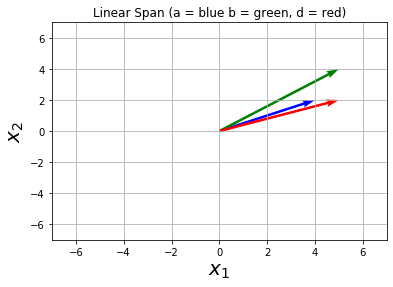

In [3]:
# plot a, b, and d 
soa = np.array([[0, 0, 4, 2], [0, 0, 5, 4], [0, 0, 5, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
plt.title('Linear Span (a = blue b = green, d = red)')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

Formally, we need to solve for the values of $c_1$ and $c_2$. If these values exist (i.e. there is a solution to this equation), then the arbitrary vector $\pmb d$ lies in the span of the vectors $\pmb a$ and $\pmb b$:
<center> $c_1 \pmb a + c_2 \pmb b = \pmb d$ </center>
- We will actually learn how to solve this problem using Matrix Notation in a future lecture, but for now you will be given the answer (how nice!):

> - $c_1 = \frac{5}{3}$ 
> - $c_2 = -\frac{1}{3}$

- Let's check to see this is correct:

In [4]:
c_1 = 5/3
c_2 = -1/3
new_a = c_1*a
new_b = c_2*b 
print("c1*a + c2*b is equal to {} and d is equal to {}".format(new_a + new_b, d)) 

c1*a + c2*b is equal to [5. 2.] and d is equal to [5 2]


In [5]:
new_a.tolist()

[6.666666666666667, 3.3333333333333335]

In [6]:
new_b.tolist()

[-1.6666666666666665, -1.3333333333333333]

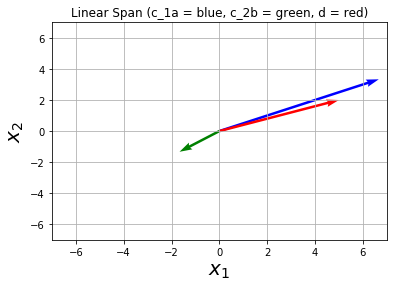

In [7]:
# plot c_1a, c_1b, and d 
soa = np.array([[0, 0, 20/3, 10/3], [0, 0, -5/3, -4/3], [0, 0, 5, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
plt.title('Linear Span (c_1a = blue, c_2b = green, d = red)')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

Compare this picture with the one above. Specifically notice the differences between the blue vector (which has been stretched by a value of 5/3, but maintained the same direction) and the green vector (which has been shrunk by a value of -1/3 and switched to the opposite direction). 

- We now should be able to "create" the red vector simply by adding the new blue and red vectors together. Remember, in order to show this visually, it is always a good idea to shift one of the two vectors. Let's shift the blue vector:

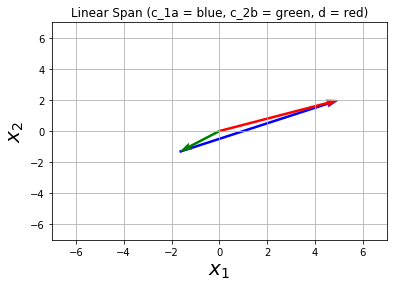

In [8]:
# plot c_1a (shifted), c_1b, and d 
soa = np.array([[-5/3, -4/3, 20/3, 10/3], [0, 0, -5/3, -4/3], [0, 0, 5, 2]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
plt.title('Linear Span (c_1a = blue, c_2b = green, d = red)')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

We can see that using a linear combination of the vectors $\pmb a$ and $\pmb b$, we were able to get to "create" the red vector. Therefore, we can say that the $\pmb d$ vector is an element of the span of the vectors $\pmb a$ and $\pmb b$.

### Example 2 (Linear Span of a Line):

So far, all the vectors we have used span the $\mathbb R^2$ space and we mentioned this is not true for any arbitrary set of vectors. So what implicit property did the vectors have that we have taken for granted? 

- It will become clear after the following example:

In [9]:
a = np.array([2,2])
b = np.array([4,4])

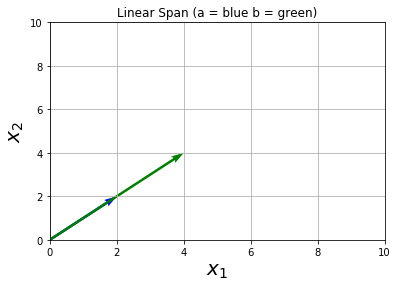

In [10]:
# plot a and b
soa = np.array([[0, 0, 2, 2], [0, 0, 4, 4]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green"])
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.title('Linear Span (a = blue b = green)')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

Immediately, what do you notice about these two vectors that are different than all the vectors we have seen so far? 

- They lie on the same line!!
- Therefore, the question is now, what is the span of these two vectors? In other words, what set of vectors can we get after applying a linear combination of these two vectors? (__Note__: The "T" beside each vector just means that we are actually working with the column vector (flipped/transposed version) and not the row vector which is shown)
> 1. Can we get the vector $[8, 8]$?
<center> $c_1*[2,2]^T + c_2*[4,4]^T = [8,8]^T$ </center>

>> $c_1 = 2$<br> 
>> $c_2 = 1$

> 2. Can we get the vector $[5, 3]$?
<center> $c_1*[2,2]^T + c_2*[4,4]^T = [5,3]^T$ </center>

>> $c_1$ = Does not exist <br>
>> $c_2$ = Does not exist

Check this below:

In [11]:
d = np.array([8,8])

In [12]:
c_1 = 2
c_2 = 1
new_a = c_1*a
new_b = c_2*b 
print("c1*a + c2*b is equal to {} and d is equal to {}".format(new_a + new_b, d)) 

c1*a + c2*b is equal to [8 8] and d is equal to [8 8]


In summary, 

- We can say that $[5,3]$ is not an element of the span of $\pmb a$ and $\pmb b$, but $[8,8]$ is an element of the span of $\pmb a$ and $\pmb b$
- But, this begs the question, what _is_ the span of $\pmb a$ and $\pmb b$? To help you answer this, let's plot all 3 vectors in the same graph

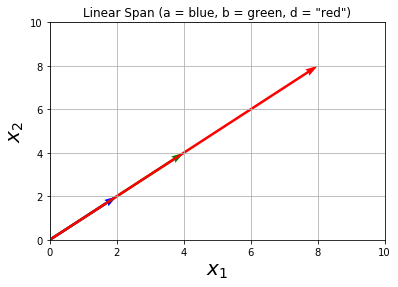

In [13]:
# plot a, b and d
soa = np.array([[0, 0, 2, 2], [0, 0, 4, 4], [0, 0, 8, 8]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.title('Linear Span (a = blue, b = green, d = "red")')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

It is clear that $[8,8]$ lies on the same line as the vectors $\pmb a$ and $\pmb b$ and since we know the vector $[8,8]$ is in the span of the original vectors, the span of the original vectors must be just this line ($y = x$) and NOT the entire $\mathbb R^2$ two-dimensional space. 

- So what was "different" about the vectors $\pmb a$ and $\pmb b$ in this case versus the previous examples? They were just multiples of each other (or as we will see in the next section, they were a set of __Linearly Dependent__ vectors)

### Problem 1:

Do the vectors $[1,2]$ and $[3,4]$ span $\mathbb R^2$? If no, what space do they span? If yes, show that any arbitrary vector, for example, $[3,3]$ can be obtained from the two vectors in the linear span. 

In [ ]:
# write your code here 





### 1.1.2 Linear Dependence:

__Overview:__ 
- __[Linear Dependence](https://en.wikipedia.org/wiki/Linear_independence):__ A set of vectors are linearly __dependent__ if one of the vectors can be defined as a linear combination of the other vectors (i.e. it "depends" on the other vectors"). Conversely, if no vector in the set can be written as a combination of any other vector, then the vectors are linearly __independent__
- It is clear in our example above that the vectors $\pmb a = [2,2]$ and $\pmb b = [4,4]$ were linearly dependent because the vector $\pmb b$ could easily be written as a linear combination of vector $\pmb a$: $2 * [2,2] = [4,4] = \pmb b$ 

__Helpful Points:__ 
1. Remember that all linear combination of a vector will lie on the same line as the original vector, so this is one way of testing if two vectors are linearly dependent 
2. Another way to think about linearly dependent vectors is that the vector that can be expressed as a linear combination of the other vector(s) is not adding any new information or directionality to the set 

__Practice:__ Examples of Linear Dependence in Python 

### Example 1 (Linerly Dependent Set):

In [14]:
# consider 3 vectors 
a = np.array([2,3])
b = np.array([3,1])
d = np.array([7,7])

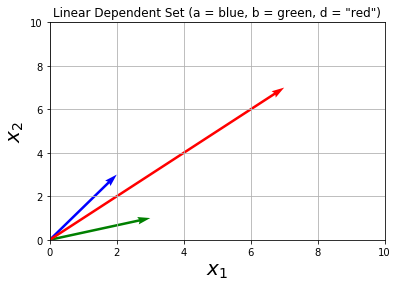

In [15]:
# plot a, b and d
soa = np.array([[0, 0, 2, 3], [0, 0, 3, 1], [0, 0, 7, 7]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.title('Linear Dependent Set (a = blue, b = green, d = "red")')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

How do we know if the vectors $\pmb a$, $\pmb b$, and $\pmb d$ are linearly dependent or not? 

> 1. __Intuitively:__ The first "hint" is that there are 3 vectors and we are in two-dimensional space. Since we already know that we only need two vectors to create any vector in $\mathbb R^2$, one of these vectors must be "extra"
> 2. __Algebraically:__ If we can express one of the 3 vectors as a linear combination of the other 2 vectors, then the set of vectors, must be linearly dependent. Let's try:

<center> $c_1[2,3]^T + c_2[3,1]^T = [7,7]^T$ </center>

Solving for $c_1$ and $c_2$, we get: 
>> $c_1 = 2$<br>
>> $c_2 = 1$

Since a solution exists, we know that the vector $\pmb d$ is simply a linear combination of the other 2 vectors and the set is linearly dependent (note that this is not a _formal_ proof, but good enough for our purposes). We can plot $c_1 \pmb a$ and $c_2 \pmb b$ and see that the resultant is simply the vector $\pmb d$:

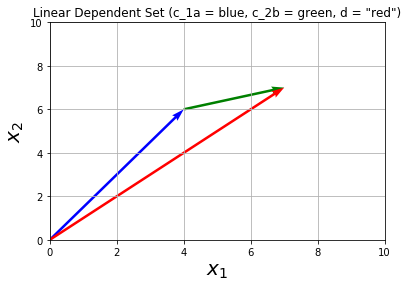

In [16]:
# plot c_1a, c_2b (shifted) and d
soa = np.array([[0, 0, 4, 6], [4, 6, 3, 1], [0, 0, 7, 7]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "green", "red"])
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.title('Linear Dependent Set (c_1a = blue, c_2b = green, d = "red")')
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.grid()

Clearly the red vector is just a linear combination of the other two vectors.

Notes:

- The span $\langle S \rangle$ of $\pmb a, \pmb b, \pmb d$ is $\mathbb R^2$ in the same way that the span $\langle S \rangle$  of just $\pmb a, \pmb b$ is $\mathbb R^2$
- The latter is simply a more "efficient" way of providing a representation of the span, whereas the former is "inefficient" because it contains redundant vectors 
- There is a formal definition of a set of vectors that are both linearly dependent and span a space, which is known as the __basis__ of the space (we will explore this later, but keep it in mind for now)

__Formal Proof of Linear Dependence:__

To check if a set of vectors $\textit S = \{\pmb u_1, \pmb u_2, ..., \pmb u_n\}$ are linearly dependent, the following condition must be true:
<center> $ \alpha_1 \pmb u_1 + \alpha_2 \pmb u_2 + ... + \alpha_n \pmb u_n = \pmb 0$, </center>
<center> if there exists other solutions other than $\alpha_1 = \alpha_2 = ... = \alpha_i = 0$ where at least one $\alpha_i \neq 0$ </center> 

In the example above, the vectors $\pmb a, \pmb b, \pmb d$ can be multiplied by coefficients other than zero to get the zero vector:

<center> $c_1*[2,3]^T + c_2[3,1]^T - c_3[7,7]^T = [0,0]^T$ </center>

> $c_1 = 2$<br>
> $c_2 = 1$<br>
> $c_3 = 1$

Since at least one of $c_i \neq 0$, the vectors must be linearly dependent 

### Example 2 (Linerly Independent Set):

In [17]:
# consider 3 vectors 
a = np.array([2,3,3])
b = np.array([9,5,7])
d = np.array([7,7,2])

Note:

- These vectors look like this in their general format: $[x_1, x_2, x_3]^T$ and they belong to the three-dimensional space $\mathbb R^3$

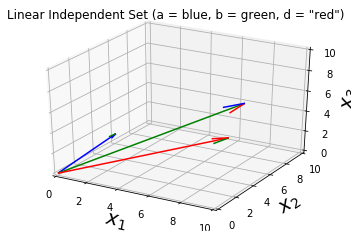

In [20]:
fig = plt.figure()
ax = fig.gca(projection="3d")
soa = np.array([[0, 0, 0, 2, 3, 3], [0, 0, 0, 9, 5, 7], [0, 0, 0, 7, 7, 2]])
X, Y, Z, U, V, W = zip(*soa)
ax.set_xlim3d(0, 10)
ax.set_ylim3d(0, 10)
ax.set_zlim3d(0, 10)
ax.quiver(X, Y, Z, U, V, W, length=1, arrow_length_ratio = 0.1, colors = ["blue", "green", "red"])
plt.title('Linear Independent Set (a = blue, b = green, d = "red")')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_3$', fontsize=20)
plt.show()

How do we know if the vectors $\pmb a$, $\pmb b$, and $\pmb d$ are linearly dependent or not? 

> 1. __Intuitively:__ The first "hint" is that there are 3 vectors and we are in three-dimensional space. Since we need three vectors to create any vector in $\mathbb R^3$, it is a good sign there are no "extra" vectors in the set 
> 2. __Algebraically:__ If we can express one of the 3 vectors as a linear combination of the other 2 vectors, then the set of vectors, must be linearly dependent. Let's try:

<center> $c_1[2,3,3]^T + c_2[9,5,7]^T = [7,7,2]^T$ </center>

Solving for $c_1$ and $c_2$, we get: 
>> $c_1$ = Does not exist<br>
>> $c_2$ = Does not exist 

Since a solution does not exist, we know that the vector $\pmb d$ is not a linear combination of the other 2 vectors and the set is linearly independent (technically, we would have to try the other variations which means this is not a _formal_ proof, but good enough for our purposes). We can also say that the span $\langle S \rangle$ of $\pmb a, \pmb b, \pmb d$ is $\mathbb R^3$ since we can get to any vector in this space using just a linear combination of these 3 vectors.

__Formal Proof of Linear Independence:__

To check if a set of vectors $\textit S = \{\pmb u_1, \pmb u_2, ..., \pmb u_n\}$ are linearly independent, the following condition must be true:
<center> $ \alpha_1 \pmb u_1 + \alpha_2 \pmb u_2 + ... + \alpha_n \pmb u_n = \pmb 0$, </center>
<center> if there exists only one solution where $\alpha_1 = \alpha_2 = ... = \alpha_i = 0$</center> 

In the example above, the vectors $\pmb a, \pmb b, \pmb d$ can not be multiplied by coefficients other than zero to get the zero vector:

<center> $c_1*[2,3,3]^T + c_2[9,5,7]^T - c_3[7,7,2]^T = [0,0,0]^T$ </center>

> $c_1 = 0$<br>
> $c_2 = 0$<br>
> $c_3 = 0$

Since the only solution is where $c_i = 0$ for $1 \leq i \leq 3$, the vectors must be linearly independent 

### Problem 2:

Check if the following vectors are linearly independent:

$a = [1,2,1]$<br>
$b = [2,4,2]$

Show how you arrived at your decision.

In [ ]:
# write your code here 





### SOLUTIONS

### Problem 1:

Do the vectors $[1,2]$ and $[3,4]$ span $\mathbb R^2$? If no, what space do they span? If yes, show that any arbitrary vector, for example, $[3,3]$ can be obtained from the two vectors in the linear span. 

The two vectors do span $\mathbb R^2$ since any arbitrary vector can be written as a linear combination of the two vectors in the span. For example, the vector $[3,3]$ can be written as the following: 

<center> $a[1,2]^T + b[3,4]^T = [3,3]^T$ </center> 
<br>
<center> $ a = \frac{-3}{2} $ </center>
<center> $ b = \frac{3}{2} $ </center> 

### Problem 2:

Check if the following vectors are linearly independent:

$a = [1,2,1]$<br>
$b = [2,4,2]$

Show how you arrived at your decision.

The vectors $\pmb a, \pmb b, \pmb d$ can be multiplied by coefficients other than zero to get the zero vector:

<center> $c_1*[1,2,1]^T + c_2[2,4,2]^T = [0,0,0]^T$ </center>

> $c_1 = -2$<br>
> $c_2 = 1$<br>

Since there exists another solution other than where $c_i = 0$ for $1 \leq i \leq 2$, the vectors must be linearly dependent.